In [50]:
import pandas as pd
import numpy as np
import pandas_profiling 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder ,OneHotEncoder 
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 

import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier,CatBoostRegressor


%matplotlib inline

In [22]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
# os.chdir(r'C:\Users\royal\Downloads\wns')
train =pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')
# sub = pd.read_csv('sample_submission_M0L0uXE.csv')

In [26]:
# os.chdir(r'C:\Users\royal\Downloads\wns')
# train =pd.read_csv('train_with_ratings.csv')
# test = pd.read_csv('test_with_ratings.csv')
# sub = pd.read_csv('sample_submission_M0L0uXE.csv')

In [72]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [73]:
train.shape
test.shape

(54808, 14)

(23490, 13)

In [74]:
for i in train.columns:
    print(i,train[i].unique())

employee_id [65438 65141  7513 ... 13918 13614 51526]
department ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']
no_of_trainings [ 1  2  3  4  7  5  6  8 10  9]
age [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating [ 5.  3.  1.  4. nan  2.]
length_of_service [ 8  4  7 10  2  5  6  1  3 16  9 11 26 

In [75]:
train['education'].replace(np.nan,"Bachelor's",inplace=True)
test['education'].replace(np.nan,"Bachelor's",inplace=True)

In [76]:
train['education'].replace("Master's & above",3,inplace=True)
test['education'].replace("Master's & above",3,inplace=True)
train['education'].replace("Bachelor's",2,inplace=True)
test['education'].replace("Bachelor's",2,inplace=True)
train['education'].replace("Below Secondary",1,inplace=True)
test['education'].replace("Below Secondary",1,inplace=True)

In [77]:
train['previous_year_rating'].replace(np.nan,3.,inplace=True)
test['previous_year_rating'].replace(np.nan,3.,inplace=True)

In [78]:
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

train['tot_score'] = train['avg_training_score'] * train['no_of_trainings']
test['tot_score'] = test['avg_training_score'] * test['no_of_trainings']

In [79]:
train[train['is_promoted']==1].groupby('previous_year_rating')['is_promoted'].count()
train.groupby('previous_year_rating')['is_promoted'].count()

previous_year_rating
1.0      88
2.0     181
3.0    1694
4.0     784
5.0    1921
Name: is_promoted, dtype: int64

previous_year_rating
1.0     6223
2.0     4225
3.0    22742
4.0     9877
5.0    11741
Name: is_promoted, dtype: int64

In [80]:
train.isna().sum()
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
sum_metric              0
tot_score               0
dtype: int64

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
sum_metric              0
tot_score               0
dtype: int64

In [58]:
# f,ax=plt.subplots(figsize=(12,12))
# sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [81]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'tot_score'],
      dtype='object')

In [61]:
# train['previous_year_rating'].value_counts().sort_index().head(50).plot.bar()

In [63]:
# test['gender'].value_counts().sort_index().head(20).plot.bar()

In [64]:
# train['avg_training_score'].value_counts().sort_index().plot.area()

In [65]:
# sns.kdeplot(train['avg_training_score'])

In [82]:
test.isnull().sum().sum()

0

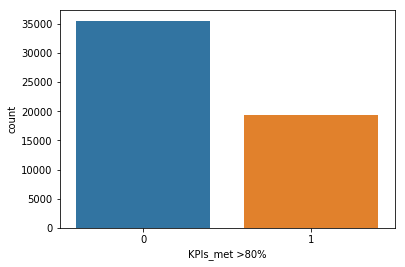

In [83]:
# sns.countplot(train['awards_won?'])
sns.countplot(train['KPIs_met >80%'])


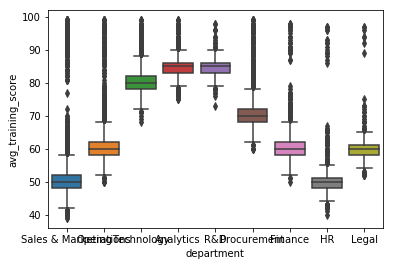

In [84]:
df= train[train.department.isin(train.department.value_counts().head(10).index)]
sns.boxplot(x='department',y='avg_training_score',data=df)

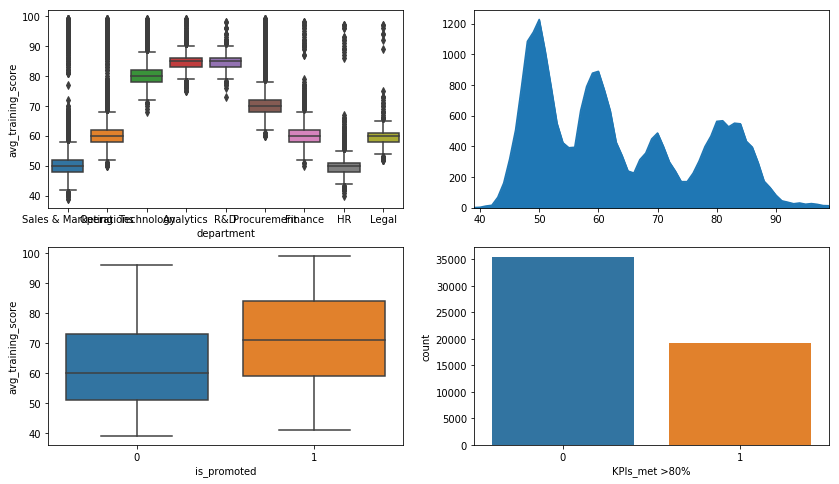

In [85]:
##can assign the each chart to one axes at a time
fig,axrr=plt.subplots(2,2,figsize=(14,8))

df= train[train.department.isin(train.department.value_counts().head(10).index)]
sns.boxplot(x='department',y='avg_training_score',data=df,ax=axrr[0][0])

# reviews['points'].value_counts().sort_index().plot.bar(ax=axrr[0][0])
# axrr[0][0].set_title('wine score',fontsize=18)

test['avg_training_score'].value_counts().sort_index()[:1000].plot.area(ax=axrr[0][1])
# sns.kdeplot(reviews[reviews['price'] < 200]['price'],ax=axrr[0][1])
# axrr[0][1].set_title('Price under 200',fontsize=18)

sns.boxplot(x='is_promoted',y='avg_training_score',data=train,ax=axrr[1][0])
# sns.countplot(reviews['points'],ax=axrr[1][0])

sns.countplot(train['KPIs_met >80%'],ax=axrr[1][1])
# reviews['province'].value_counts().head(20).plot.bar(ax=axrr[1][1])

In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['department'] = le.fit_transform(train['department'])
test['department'] = le.transform(test['department'])

In [87]:
train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])
# train['education'] = le.fit_transform(train['education'])
# test['education'] = le.transform(test['education'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])

train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.transform(test['recruitment_channel'])

In [88]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,65438,7,31,3,0,2,1,35,5.0,8,1,0,49,0,6.0,49
1,65141,4,14,2,1,0,1,30,5.0,4,0,0,60,0,5.0,60
2,7513,7,10,2,1,2,1,34,3.0,7,0,0,50,0,3.0,50
3,2542,7,15,2,1,0,2,39,1.0,10,0,0,50,0,1.0,100
4,48945,8,18,2,1,0,1,45,3.0,2,0,0,73,0,3.0,73


In [89]:
Y1=train['is_promoted']
# train1=train.drop(['employee_id','is_promoted'],axis=1)
train1=train.drop(['employee_id','is_promoted','recruitment_channel'],axis=1)
train1=train1.values
Y=Y1.values

test_id=test['employee_id']
# test1 = test.drop(['employee_id'],axis=1)
test1 = test.drop(['employee_id','recruitment_channel'],axis=1)
test1=test1.values

In [90]:
# enc = OneHotEncoder()
# enc.fit(train1)
# train2_one = enc.transform(train1)
# test2_one = enc.transform(test1)

# pca = PCA(n_components=1)
# pca.fit(train2_one.toarray())
# train_pca = pca.transform(train2_one.toarray())
# test_pca = pca.transform(test2_one.toarray())
# train3=np.column_stack((train2,train_pca))
# test3=np.column_stack((test2,test_pca))

In [91]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(train2)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, train.is_promoted], axis = 1)
# finalDf.head(5)

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)

# targets = [0,1]
# colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['is_promoted'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [93]:
# pca = PCA(n_components=1)
# pca.fit(train2)
# train_pca = pca.transform(train2)
# test_pca = pca.transform(test2)
# train3=np.column_stack((train2,train_pca))
# test3=np.column_stack((test2,test_pca))

In [95]:
# train3.shape

In [181]:
# ##feature selection to get important features only.
# sel = VarianceThreshold(threshold=.1)
# sel.fit(train2)
# train_thres = sel.transform(train2)
# test_thres = sel.transform(test2)

# train3=np.column_stack((train3,train_thres))
# test3=np.column_stack((test3,test_thres))

VarianceThreshold(threshold=0.1)

In [97]:
# scaler = StandardScaler()
# scaler.fit(train1)
# # Apply transform to both the training set and the test set.
# train2 = scaler.transform(train1)
# test2 = scaler.transform(test1)

In [23]:
# min_max_scaler = preprocessing.FunctionTransformer(np.log1p)
# train2 = min_max_scaler.transform(train1)
# test2 = min_max_scaler.transform(test1)

In [99]:
#create the cross validation fold for different boosting and linear model.
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
SEED=42
# clf = lgb.LGBMClassifier()
st_train = train3
st_test = test3
# clf = xgb.XGBClassifier()
# clf = RandomForestClassifier(max_depth=4, random_state=0)
# clf = lgb.LGBMClassifier(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422) #lgb_pca
#clf = lgb.LGBMClassifier(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422) #lgb_pca
# clf = lgb.LGBMClassifier(max_depth= 6, learning_rate=0.0527, n_estimators=396, num_leaves= 18, reg_alpha=2.3683 , reg_lambda= 0.0152) #lgb_pca

# clf=ExtraTreesClassifier(n_estimators=10000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)
clf = xgb.XGBClassifier(gamma = 0.7233,learning_rate = 0.0480,max_depth = 10,min_child_weight = 2,n_estimators = 450)
# clf = RGFClassifier(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")

fold = 8
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True, random_state=42)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
    mod = clf.fit(st_train[tr], Y[tr])
    X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    preds += mod.predict_proba(st_test)[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(f1_score(Y[ts], predictions))
score = roc_auc_score(Y, X_preds)
print(score)
preds1 = preds/fold

NameError: name 'train3' is not defined

0.524048096192
0.25


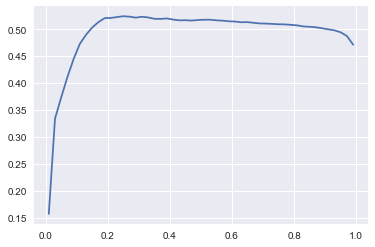

In [93]:
# pick the best threshold out-of-fold
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([f1_score(Y, X_preds>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())
print(best_threshold)

(6852,)
fold 0, ROC AUC: 0.910
0.468911917098
(6852,)
fold 1, ROC AUC: 0.910
0.505102040816
(6852,)
fold 2, ROC AUC: 0.915
0.493081761006
(6852,)
fold 3, ROC AUC: 0.909
0.505660377358
(6850,)
fold 4, ROC AUC: 0.911
0.498727735369
(6850,)
fold 5, ROC AUC: 0.916
0.534146341463
(6850,)
fold 6, ROC AUC: 0.915
0.496831432193
(6850,)
fold 7, ROC AUC: 0.912
0.503128911139
0.912270469164

0.52392578125
0.25

In [94]:
##create the submission file.
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'employee_id': test_id, 'is_promoted': prediction_rfc})
sub=sub.reindex(columns=["employee_id","is_promoted"])
sub.to_csv('submission.csv', index=False)

In [179]:
##for OOF files generation.
os.chdir(r'C:\Users\royal\Downloads\wns\New folder')
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'employee_id': test_id, 'is_promoted': prediction_rfc})
sub=sub.reindex(columns=["employee_id","is_promoted"])
filename = 'submission_test_'+'lgm_thres_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)


prediction_tr=list(range(len(X_preds)))
for i in range(len(X_preds)):
    prediction_tr[i]=1 if X_preds[i]>best_threshold else 0

sub = pd.DataFrame({'employee_id': train.is_promoted, 'is_promoted': prediction_tr})
sub=sub.reindex(columns=["employee_id","is_promoted"])
filename = filename = 'submission_train_'+'lgm_thres_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)

#######
sub = pd.DataFrame({'employee_id': test_id, 'is_promoted': preds1})
sub=sub.reindex(columns=["employee_id","is_promoted"])
filename = 'submission_test_'+'lgm_thres_pred_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)

sub = pd.DataFrame({'employee_id': train.employee_id, 'is_promoted': X_preds})
sub=sub.reindex(columns=["employee_id","is_promoted"])
filename = 'submission_train_'+'lgm_thres_pred_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.0941, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=197,
        n_jobs=-1, num_leaves=17, objective=None, random_state=None,
        reg_alpha=3.4492, reg_lambda=0.0422, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

0.532352941176
0.35


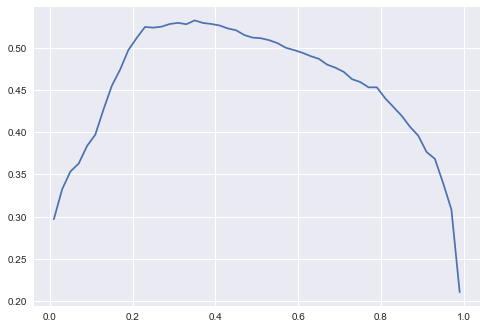

In [58]:
#done prediction using test train split
from sklearn.cross_validation import train_test_split
x,y = train3,Y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
clf = lgb.LGBMClassifier(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422) #lgb_pca
clf.fit(x_train, y_train)

y_pred = clf.predict_proba(x_test)[:,1]
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([f1_score(y_test, y_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())
print(best_threshold)

y_pred1 = clf.predict_proba(test3)

In [88]:
os.chdir(r'C:\Users\royal\Downloads\wns\New folder\New folder')
meta=["lgm_pca_pred","lgm_pca1_pred","lgm_pca30_pred","lgm_pred","lgm_tune_pred","rgf_pred"]

meta_folder=""
y = np.loadtxt("train_LZdllcl.csv", delimiter=',',usecols=[13], skiprows=1)
Xmetatrain=None
Xmetatest=None
kk=0
for modelname in meta :
    mini_xtrain=np.loadtxt(meta_folder +'submission_train_'+ modelname + '.csv', delimiter=',',skiprows=1,usecols=range(1,2)) # we load the held out prediction of the int'train.csv' model
    mini_xtest=np.loadtxt(meta_folder + 'submission_test_' +modelname + '.csv', delimiter=',',skiprows=1,usecols=range(1,2))   # we load the test set prediction of the int'test.csv' model
    mean_train=np.mean(mini_xtrain) # we calclaute the mean of the train set held out predictions for reconciliation purposes
    mean_test=np.mean(mini_xtest)    # we calclaute the mean of the test set  predictions      
    if kk==0:
        kk=kk+1
        Xmetatrain=mini_xtrain
        Xmetatest=mini_xtest
    else :
        Xmetatrain=np.column_stack((Xmetatrain,mini_xtrain))
        Xmetatest=np.column_stack((Xmetatest,mini_xtest))
X=Xmetatrain
X_test=Xmetatest

,principal component 1,principal component 2,is_promoted
0,0.391762,-0.039531,0
1,-0.177524,0.018943,0
2,-0.196362,0.002029,0
3,-0.198872,-0.004405,0
4,-0.193101,-0.009436,0


Text(0.5,0,'Principal Component 1')

Text(0,0.5,'Principal Component 2')

Text(0.5,1,'2 Component PCA')

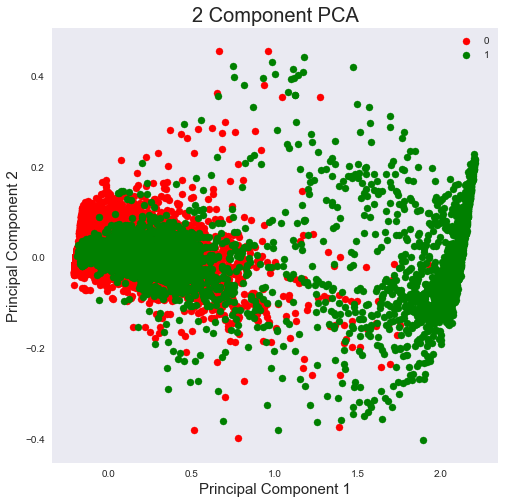

In [90]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, train.is_promoted], axis = 1)
finalDf.head(5)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['is_promoted'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [100]:
scaler = StandardScaler()
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
X_test = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [89]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X)
X  = min_max_scaler.transform(X)
X_test = min_max_scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [91]:
pca = PCA(n_components=2)
pca.fit(X)
train_pca = pca.transform(X)
test_pca = pca.transform(X_test)
train_X=np.column_stack((X,train_pca))
test_X=np.column_stack((X_test,test_pca))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
#Ensemble the models generated in first level.

st_train = train_X
st_test = test_X
clf = lgb.LGBMClassifier()
clf = LogisticRegression()
#clf = RGFClassifier(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")
# clf = Ridge()
# clf = lgb.LGBMClassifier(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422) #lgb_pca
# clf=ExtraTreesClassifier(n_estimators=10000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)

fold = 8
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True, random_state=30)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
    mod = clf.fit(st_train[tr], Y[tr])
    X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    preds += mod.predict_proba(st_test)[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(f1_score(Y[ts], predictions))
score = roc_auc_score(Y, X_preds)
print(score)
preds1 = preds/fold

NameError: name 'train_X' is not defined

In [96]:
os.chdir(r'C:\Users\royal\Downloads\wns\New folder\New folder\New folder')
os.listdir()

['submission.csv',
 'submission_ensemb.csv',
 'submission_test_lgm.csv',
 'submission_test_lgm_pca.csv',
 'submission_test_lgm_pca1.csv',
 'submission_test_lgm_pca30.csv',
 'submission_test_lgm_thres.csv',
 'submission_test_lgm_tune.csv',
 'submission_test_lgm_var.csv',
 'submission_test_rgf.csv',
 'submission_train_lgm.csv',
 'submission_train_lgm_pca.csv',
 'submission_train_lgm_pca1.csv',
 'submission_train_lgm_pca30.csv',
 'submission_train_lgm_thres.csv',
 'submission_train_lgm_tune.csv',
 'submission_train_lgm_var.csv',
 'submission_train_rgf.csv']

In [60]:
##simple average Blend.
preds1=(t1['is_promoted']+t6['is_promoted']+t3['is_promoted']+t4['is_promoted']+t5['is_promoted'])/6

prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>=0.60 else 0

sub = pd.DataFrame({'employee_id': test_id, 'is_promoted': prediction_rfc})
sub=sub.reindex(columns=["employee_id","is_promoted"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)